# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [239]:
print("Для того чтобы рандом всегда работал одинаково и эксперименты были воспроизводимы")

Для того чтобы рандом всегда работал одинаково и эксперименты были воспроизводимы


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [240]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [241]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [242]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [243]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [244]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [245]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [246]:
df_train[df_train.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
6889,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6901,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6949,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [247]:
print("Пропуски в этих колонках")
print(df_train.columns[df_train.isna().any()].tolist())

Пропуски в этих колонках
['mileage', 'engine', 'max_power', 'torque', 'seats']


In [248]:
df_test[df_test.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
34,Toyota Etios Liva GD SP,2012,405000,150000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
57,Tata Sumo EX BS IV,2012,254999,190000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
66,Maruti Swift 1.3 ZXI,2008,200000,90000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
71,Hyundai Santro LE,2002,35000,184000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
118,Mahindra Bolero LX,2006,210000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
145,Maruti Swift VDI BSIV,2011,340000,160000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
149,Hyundai Santro Xing XG,2005,110000,53563,Petrol,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
208,Tata Indica Vista Aqua 1.3 Quadrajet (ABS),2012,200000,80000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
295,Hyundai Santro Xing XS eRLX Euro II,2003,85000,68300,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
471,Hyundai Santro GLS I - Euro II,2009,195000,56000,Petrol,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [249]:
print("Пропуски в этих колонках")
print(df_test.columns[df_test.isna().any()].tolist())

Пропуски в этих колонках
['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [250]:
df1 = df_train.drop('selling_price', axis=1)

print(len(df1[df1.duplicated(keep='first')]))


1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [251]:
df1[df1.duplicated(keep='first')]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [252]:
df_train_no_dup = df1.drop_duplicates(keep='first')
df_train_no_dup

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [253]:
df_train_no_dup['selling_price'] = df_train.iloc[df_train_no_dup.index]['selling_price']

C:\Users\Grisha\AppData\Local\Temp\ipykernel_8560\37315630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_no_dup['selling_price'] = df_train.iloc[df_train_no_dup.index]['selling_price']


In [254]:
df_train_no_dup

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,120000
6993,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,260000
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,320000
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,135000


In [255]:
df_train = df_train_no_dup

In [256]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [257]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,120000
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,260000
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,320000
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,135000


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [258]:
import re

def preprocess(x):
    if not type(x) == float:
        if re.search(r'\d*.?\d+', x):
            return float(re.search(r'\d*.?\d+', x).group())
        else:
            return np.nan
    else:
        return np.nan

def preprocess_torque(x):
    if not type(x) == float:
        matches = re.findall(r'\d*[.,]?\d+', x)
        max_torque = matches[-1].replace('.', '').replace(',', '')
        return float(matches[0]), float(max_torque)
    else:
        return np.nan

In [259]:
df_train['mileage'] = df_train['mileage'].apply(preprocess)
df_train['engine'] = df_train['engine'].apply(preprocess)
df_train['max_power'] = df_train['max_power'].apply(preprocess)

split = pd.DataFrame(df_train['torque'].apply(preprocess_torque).to_list(), columns = ['torque_new', 'max_torque_rpm'])
df_train = pd.concat([df_train, split], axis=1)

In [318]:
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,old_torque,seats,selling_price,torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,450000,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,370000,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,225000,22.40,2750.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,130000,11.50,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5,440000,113.75,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.1Nm@ 3000rpm,5,120000,96.10,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90Nm@ 3500rpm,5,260000,90.00,3500.0
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,320000,113.70,4000.0
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,135000,24.00,2750.0


In [261]:
df_test['mileage'] = df_test['mileage'].apply(preprocess)
df_test['engine'] = df_test['engine'].apply(preprocess)
df_test['max_power'] = df_test['max_power'].apply(preprocess)

split = pd.DataFrame(df_test['torque'].apply(preprocess_torque).to_list(), columns = ['torque_new', 'max_torque_rpm'])
df_test = pd.concat([df_test, split], axis=1)

In [262]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_new,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260 Nm at 1800-2200 rpm,7.0,260.00,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0,260.00,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172Nm@ 4300rpm,5.0,172.00,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200Nm@ 1750rpm,5.0,200.00,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96 Nm at 3000 rpm,5.0,96.00,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04Nm@ 4500rpm,5.0,99.04,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0,114.70,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.40,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.8Nm@ 4000rpm,5.0,111.80,4000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [263]:
for col in ['mileage', 'engine', 'max_power', 'torque_new', 'max_torque_rpm', 'seats']:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_train[col].median())  # медиана по трейну

In [264]:
for col in ['mileage', 'engine', 'max_power', 'torque_new', 'max_torque_rpm', 'seats']:
    print(col)
    print(df_train[col].isna().value_counts())
    print()
    print(df_test[col].isna().value_counts())
    print()

mileage
False    5840
Name: mileage, dtype: int64

False    1000
Name: mileage, dtype: int64

engine
False    5840
Name: engine, dtype: int64

False    1000
Name: engine, dtype: int64

max_power
False    5840
Name: max_power, dtype: int64

False    1000
Name: max_power, dtype: int64

torque_new
False    5840
Name: torque_new, dtype: int64

False    1000
Name: torque_new, dtype: int64

max_torque_rpm
False    5840
Name: max_torque_rpm, dtype: int64

False    1000
Name: max_torque_rpm, dtype: int64

seats
False    5840
Name: seats, dtype: int64

False    1000
Name: seats, dtype: int64



In [265]:
df_train[df_train[['mileage', 'engine', 'max_power', 'torque_new', 'max_torque_rpm']].isna().any(axis=1)]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,torque_new,max_torque_rpm


In [266]:
df_train.columns = ['name',
 'year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'old_torque',
 'seats',
 'selling_price',
 'torque',
 'max_torque_rpm']

In [267]:
df_test.columns = ['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'old_torque',
 'seats',
 'torque',
 'max_torque_rpm']


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [268]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_train['engine'].astype(int)
df_test['seats'] = df_train['seats'].astype(int)

In [269]:
df_test['seats'].value_counts()

5     776
7     146
8      33
4      17
9      14
6      12
10      2
Name: seats, dtype: int64

Потому что в seats всего 7 уникальных значений (конечное множество), лучше сделать признак категориальным

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

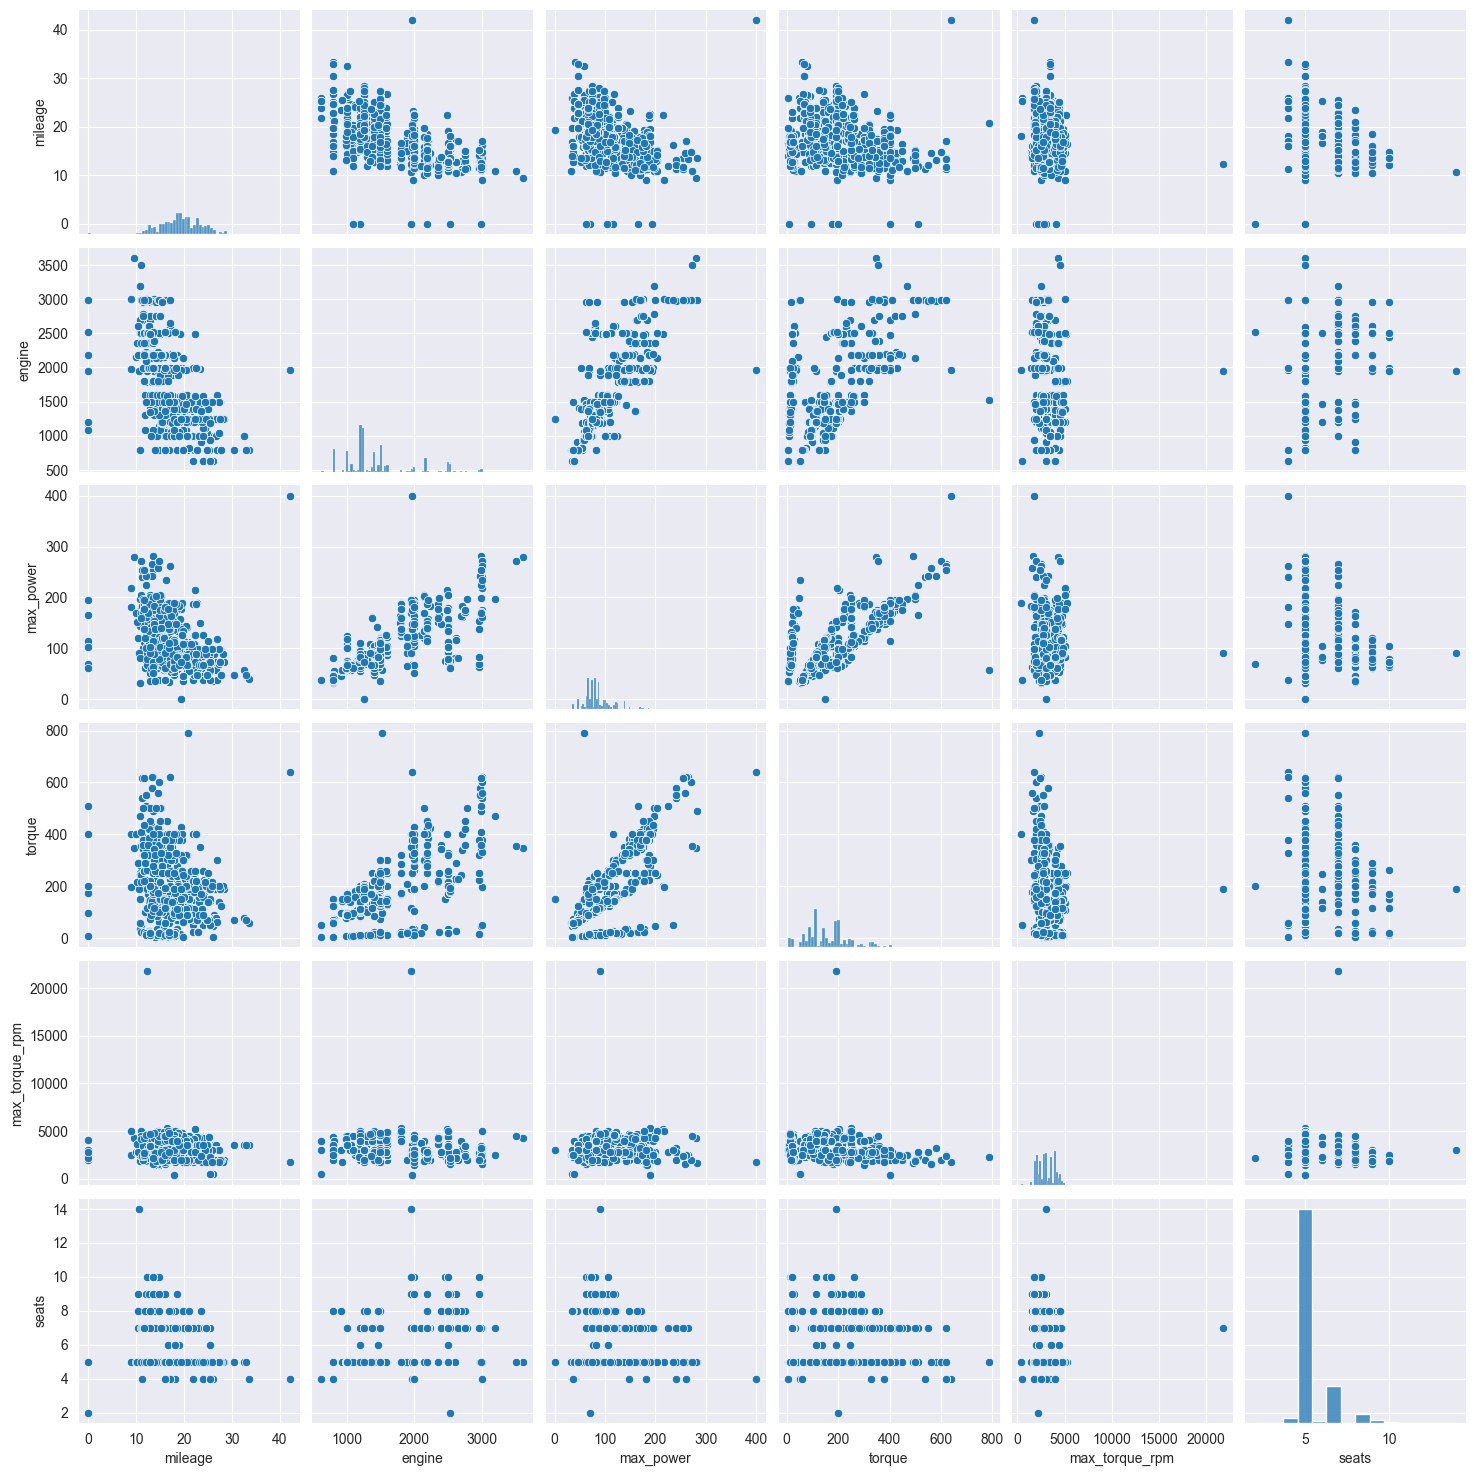

In [271]:
sns.pairplot(df_train[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Цена выше, если:
1. меньше km_driven
2. выше max_power
3. больше год выпуска

1. max_power и torque - прямая корреляция
2. max_power и engine - прямая корреляция

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

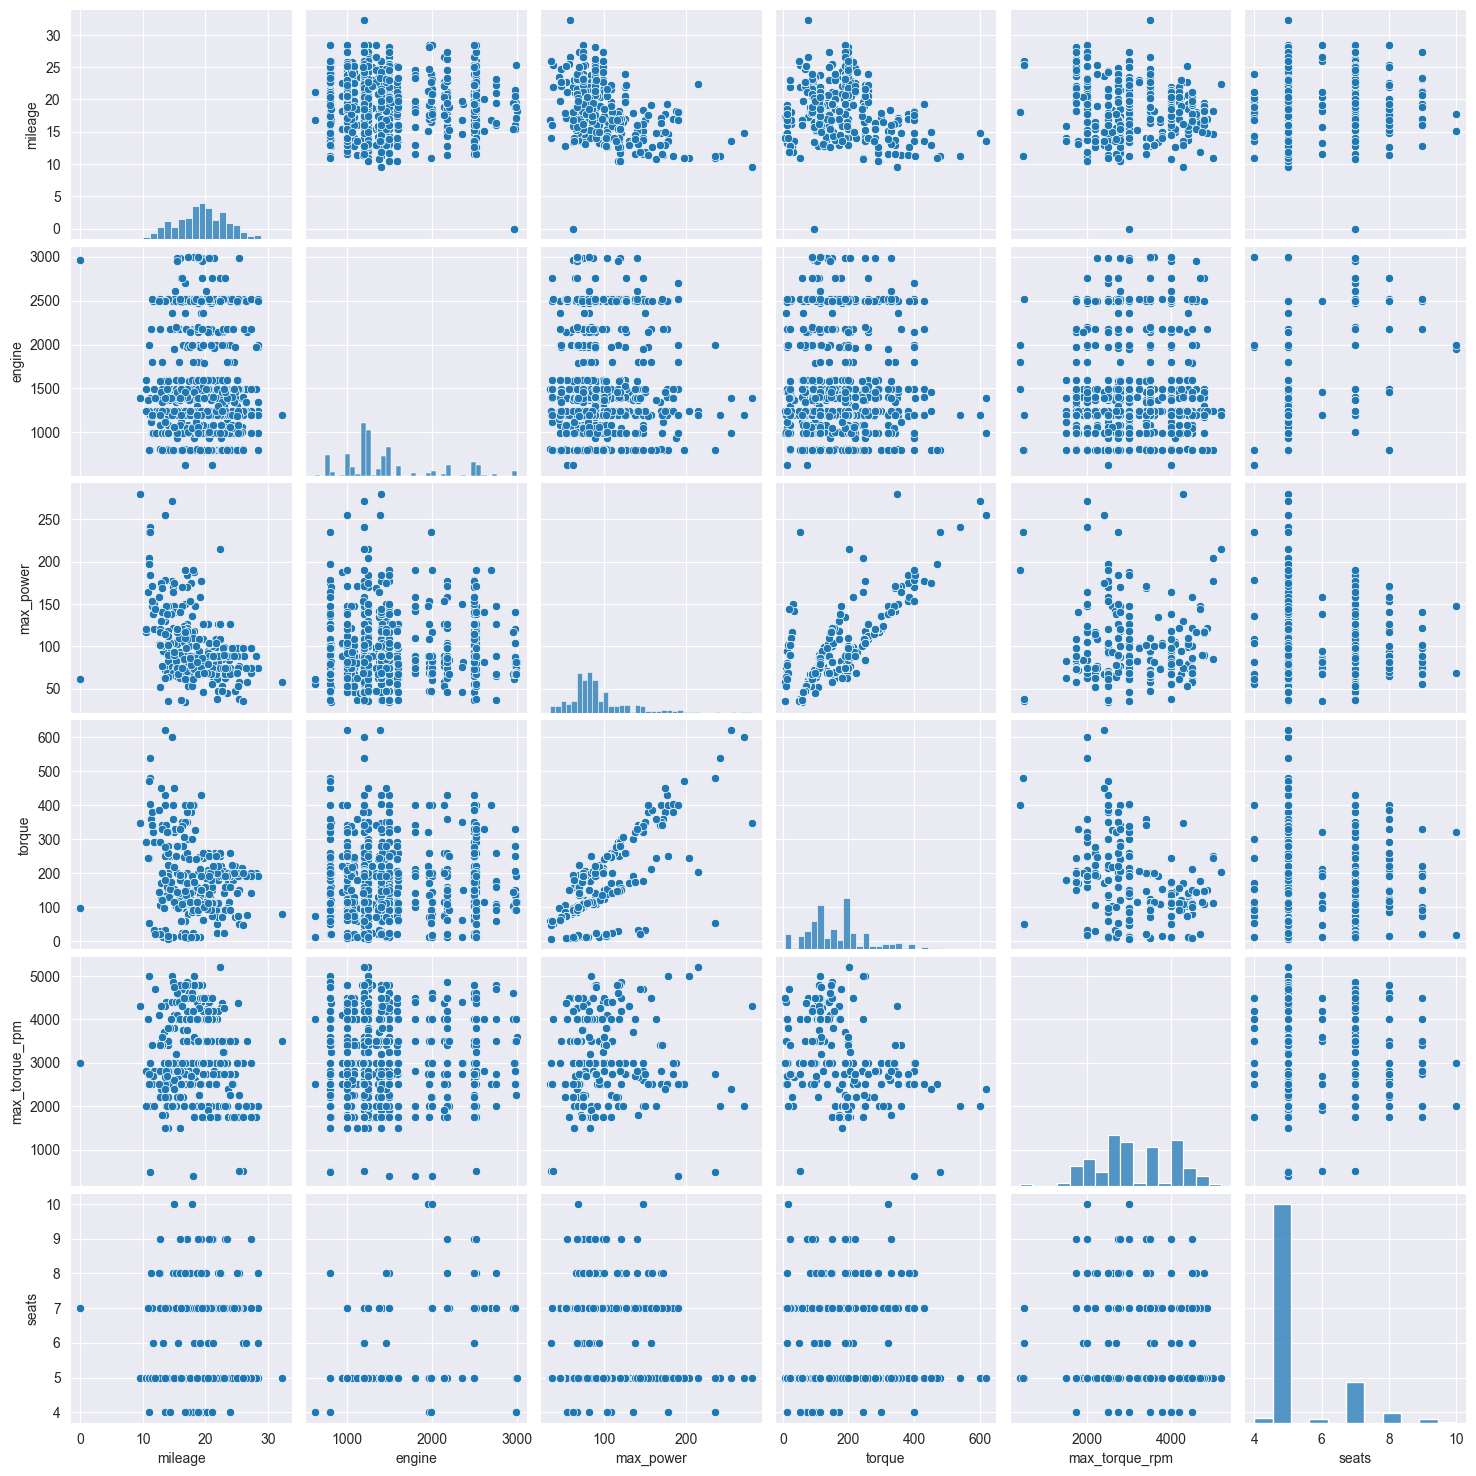

In [272]:
sns.pairplot(df_test[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']])

В целом похожи но не сильно

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot: >

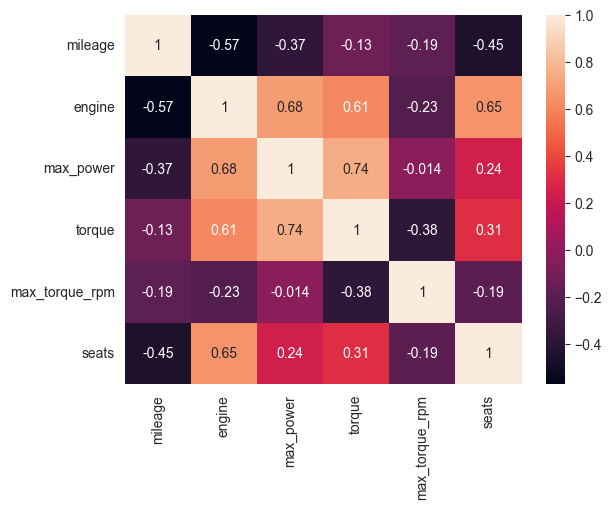

In [273]:
sns.heatmap(df_train[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']].corr(), annot=True)


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. mileage - engine
2. max_power - selling_price, max_power - engine, seats - engine
3. не правильно, не такая сильная корелляция

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [274]:
df_train[['torque', 'max_torque_rpm']]

,torque,max_torque_rpm
0,190.00,2000.0
1,250.00,2500.0
2,22.40,2750.0
3,11.50,4500.0
4,113.75,4000.0
...,...,...
5835,96.10,3000.0
5836,90.00,3500.0
5837,113.70,4000.0
5838,24.00,2750.0


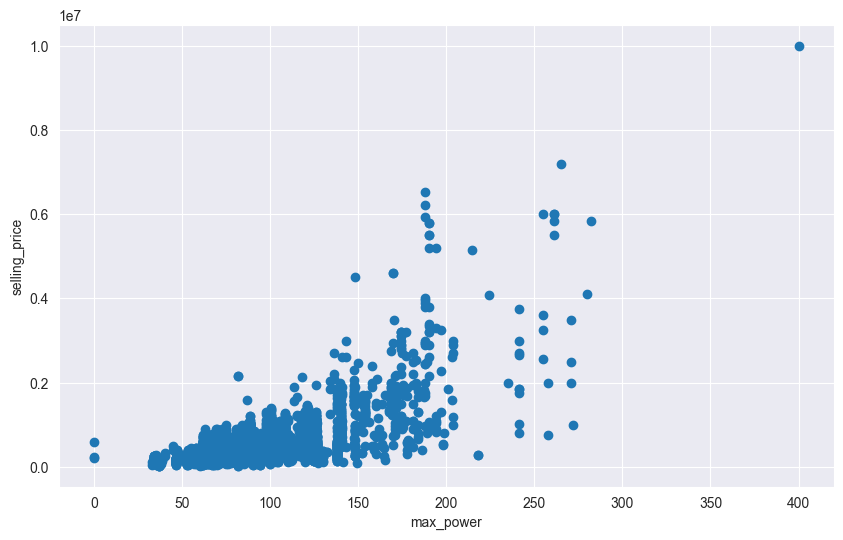

In [275]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_train['max_power'], y = df_train['selling_price'])
plt.xlabel("max_power")
plt.ylabel("selling_price")

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Просто посмотрим распределения фич

<AxesSubplot: >

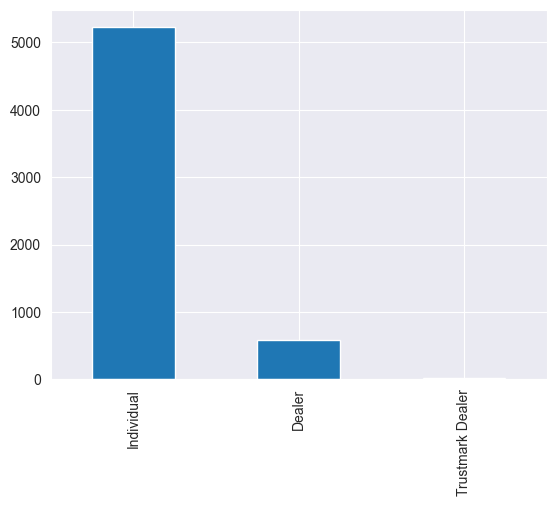

In [276]:
df_train['seller_type'].value_counts().plot.bar()

<AxesSubplot: >

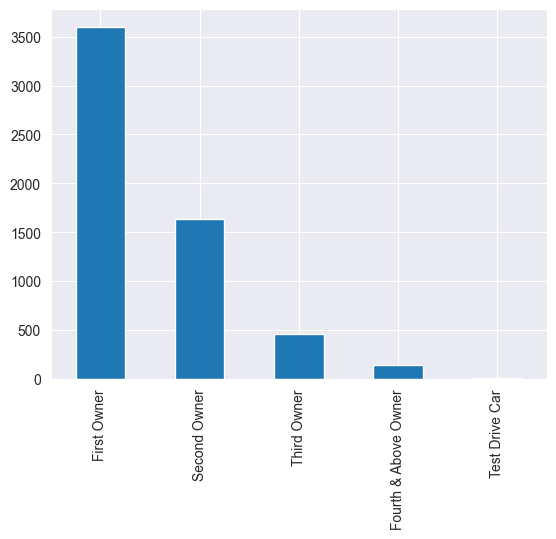

In [277]:
df_train['owner'].value_counts().plot.bar()

<AxesSubplot: >

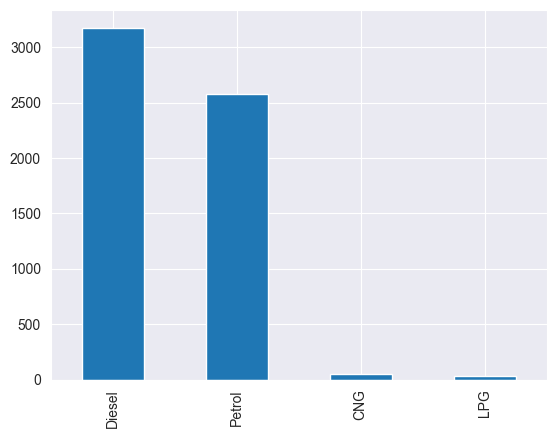

In [278]:
df_train['fuel'].value_counts().plot.bar()

В нашей задаче важно обращать внимания на выбросы

<AxesSubplot: >

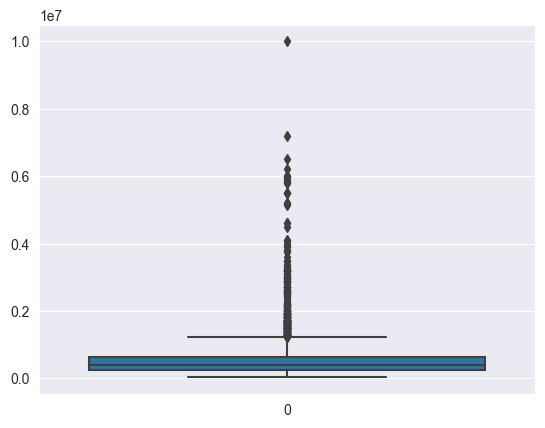

In [353]:
sns.boxplot(df_train["selling_price"])

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [279]:
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,old_torque,seats,selling_price,torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,450000,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,370000,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,225000,22.40,2750.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,130000,11.50,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5,440000,113.75,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.1Nm@ 3000rpm,5,120000,96.10,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90Nm@ 3500rpm,5,260000,90.00,3500.0
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,320000,113.70,4000.0
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,135000,24.00,2750.0


In [280]:
y_train = df_train['selling_price']
X_train = df_train[['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']]

In [281]:
assert X_train.shape == (5840, 7)

In [282]:
y_test = df_test['selling_price']
X_test = df_test[['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']]


In [283]:
assert X_test.shape == (1000, 7)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
import joblib

reg = LinearRegression().fit(X_train, y_train)

preds = reg.predict(X_train)
print('TRAIN')
print('MSE', MSE(y_train, preds))
print('R2', r2_score(y_train, preds))
print()
preds = reg.predict(X_test)
print('TEST')
print('MSE', MSE(y_test, preds))
print('R2', r2_score(y_test, preds))

joblib.dump(reg, 'LogReg_nocat.pkl')

TRAIN
MSE 129359008811.29391
R2 0.5487030466602105

TEST
MSE 252522471749.11307
R2 0.5606995002733569


['LogReg_nocat.pkl']

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [328]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = LinearRegression().fit(X_train, y_train)

preds = reg.predict(X_train)
print('TRAIN')
print('MSE', MSE(y_train, preds))
print('R2', r2_score(y_train, preds))
print()
preds = reg.predict(X_test)
print('TEST')
print('MSE', MSE(y_test, preds))
print('R2', r2_score(y_test, preds))

joblib.dump(reg, 'LogReg_nocat_scaled.pkl')

TRAIN
MSE 129359008811.29391
R2 0.5487030466602105

TEST
MSE 252522471749.11313
R2 0.5606995002733568


['LogReg_nocat_scaled.pkl']

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [333]:
X_train

array([[ 1.19115249,  0.995867  , -0.37364298, ..., -0.43441899,
         0.31470371, -1.13116238],
       [ 0.76661943,  0.42883018,  0.14116151, ..., -0.43441899,
         0.97284035, -0.58661777],
       [ 0.88315792,  0.8955065 , -0.06887872, ..., -0.43441899,
        -1.52369128, -0.31434546],
       ...,
       [ 0.60013588, -0.2335491 , -0.4786631 , ..., -0.43441899,
        -0.5222267 ,  1.04701607],
       [ 0.74997108, -0.66008122,  0.13086542, ..., -0.43441899,
        -1.50614097, -0.31434546],
       [ 0.76661943, -0.03282811, -0.37364298, ..., -0.43441899,
         0.31470371, -1.13116238]])

In [331]:
coef = reg.coef_
coef

array([-96395.18227602,  75980.87388904,  32606.03074955, 319288.34158999,
         7539.95154308,  78119.88236946, -10700.09677555])

**max_power**

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [334]:
from sklearn.linear_model import Lasso

reg = Lasso().fit(X_train, y_train)

preds = reg.predict(X_train)
print('TRAIN')
print('MSE', MSE(y_train, preds))
print('R2', r2_score(y_train, preds))
print()
preds = reg.predict(X_test)
print('TEST')
print('MSE', MSE(y_test, preds))
print('R2', r2_score(y_test, preds))

joblib.dump(reg, 'Lasso_nocat.pkl')

TRAIN
MSE 129359008818.93039
R2 0.548703046633569

TEST
MSE 252522549330.4005
R2 0.5606993653091372


['Lasso_nocat.pkl']

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [335]:
reg.coef_

array([-96393.95991392,  75978.3734736 ,  32604.95370448, 319286.29929023,
         7538.44423382,  78121.45409886, -10699.30482286])

не занулила - надо подбирать гиперпараметры видимо изза дефолтного alpha = 1.0

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [344]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.0, 0.1, 0.5, 1, 10, 100, 1000, 10000, 15000, 26000, 30000],
              'fit_intercept': [True, False],
              'normalize': [True, False]}
reg = Lasso()
clf = GridSearchCV(reg, parameters)

clf.fit(X_train, y_train)

C:\Users\Grisha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Grisha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.1, 0.5, 1, 10, 100, 1000, 10000,
                                   15000, 26000, 30000],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [345]:
clf.best_params_

{'alpha': 10000, 'fit_intercept': True, 'normalize': False}

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

40 моделей (все возможные сочеетания параметров)

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [346]:
reg = Lasso(**clf.best_params_).fit(X_train, y_train)
reg.coef_

C:\Users\Grisha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


array([-83880.30261957,  51964.41330618,  14531.09628041, 303802.27905877,
            0.        ,  92187.08766725,  -3335.02846324])

занулился 1 признак

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [347]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'l1_ratio': np.linspace(0,1,11)}
reg = ElasticNet()
clf = GridSearchCV(reg, parameters, cv=10)

clf.fit(X_train, y_train)

clf.best_params_

C:\Users\Grisha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.914e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Grisha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.522e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently 

{'alpha': 1, 'l1_ratio': 0.8}

In [348]:
reg = ElasticNet(**clf.best_params_).fit(X_train, y_train)

preds = reg.predict(X_train)
print('TRAIN')
print('MSE', MSE(y_train, preds))
print('R2', r2_score(y_train, preds))
print()
preds = reg.predict(X_test)
print('TEST')
print('MSE', MSE(y_test, preds))
print('R2', r2_score(y_test, preds))

joblib.dump(reg, 'ElasticNet_nocat_bestparams.pkl')

TRAIN
MSE 132921234447.06525
R2 0.5362754500721936

TEST
MSE 286284842567.98914
R2 0.5019648210586523


['ElasticNet_nocat_bestparams.pkl']

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [298]:
clf.best_params_


{'alpha': 0.8, 'l1_ratio': 0.7000000000000001}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [299]:
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,old_torque,seats,selling_price,torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,450000,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,370000,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,225000,22.40,2750.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,130000,11.50,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5,440000,113.75,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.1Nm@ 3000rpm,5,120000,96.10,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90Nm@ 3500rpm,5,260000,90.00,3500.0
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,320000,113.70,4000.0
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,135000,24.00,2750.0


In [300]:
X_train_cat = df_train.drop(['name', 'selling_price', 'old_torque'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price', 'old_torque'], axis=1)

In [301]:
X_train_cat.shape

(5840, 12)

In [302]:
assert X_train_cat.shape == (5840, 12)

In [303]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [304]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

enc = OneHotEncoder(handle_unknown='ignore')

In [305]:
encoder_df = pd.DataFrame(enc.fit_transform(X_train_cat[['fuel']]).toarray())
encoder_df.columns = enc.get_feature_names_out()
X_train_cat = X_train_cat.join(encoder_df)

encoder_df_test = pd.DataFrame(enc.transform(X_test_cat[['fuel']]).toarray())
encoder_df_test.columns = enc.get_feature_names_out()
X_test_cat = X_test_cat.join(encoder_df_test)

In [306]:
encoder_df = pd.DataFrame(enc.fit_transform(X_train_cat[['seller_type']]).toarray())
encoder_df.columns = enc.get_feature_names_out()
X_train_cat = X_train_cat.join(encoder_df)

encoder_df_test = pd.DataFrame(enc.transform(X_test_cat[['seller_type']]).toarray())
encoder_df_test.columns = enc.get_feature_names_out()
X_test_cat = X_test_cat.join(encoder_df_test)

In [307]:
encoder_df = pd.DataFrame(enc.fit_transform(X_train_cat[['transmission']]).toarray())
encoder_df.columns = enc.get_feature_names_out()
X_train_cat = X_train_cat.join(encoder_df)

encoder_df_test = pd.DataFrame(enc.transform(X_test_cat[['transmission']]).toarray())
encoder_df_test.columns = enc.get_feature_names_out()
X_test_cat = X_test_cat.join(encoder_df_test)

In [308]:
encoder_df = pd.DataFrame(enc.fit_transform(X_train_cat[['owner']]).toarray())
encoder_df.columns = enc.get_feature_names_out()
X_train_cat = X_train_cat.join(encoder_df)

encoder_df_test = pd.DataFrame(enc.transform(X_test_cat[['owner']]).toarray())
encoder_df_test.columns = enc.get_feature_names_out()
X_test_cat = X_test_cat.join(encoder_df_test)

In [309]:
X_train_cat = X_train_cat.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)
X_test_cat = X_test_cat.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [310]:
X_train_cat

,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,5,190.00,2000.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,5,250.00,2500.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,5,22.40,2750.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,5,11.50,4500.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,5,113.75,4000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5,96.10,3000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,5,90.00,3500.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,5,113.70,4000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,5,24.00,2750.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [311]:
X_test_cat

,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2010,168000,14.00,1248,112.00,5,260.00,2200.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.50,1498,108.50,5,260.00,2750.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2007,218463,12.90,1396,130.00,5,172.00,4300.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015,173000,25.10,1298,98.60,5,200.00,1750.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2011,70000,16.50,1197,65.00,5,96.00,3000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1396,68.05,5,99.04,4500.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
996,2017,50000,18.60,1197,81.83,5,114.70,4000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
997,2009,40000,23.00,1497,90.00,5,22.40,2750.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
998,2012,25000,20.36,796,78.90,5,111.80,4000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Да, категориальные признаки помогают

In [349]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.0, 0.1, 0.5, 1, 10, 100, 1000, 10000, 15000, 26000, 30000]}
reg = Ridge()
clf = GridSearchCV(reg, parameters, scoring='r2', cv=10)

clf.fit(X_train_cat, y_train)

clf.best_params_

{'alpha': 10}

In [350]:
reg = Ridge(**clf.best_params_)
reg.fit(X_train_cat, y_train)

Ridge(alpha=10)

In [351]:
preds = reg.predict(X_train_cat)
print('TRAIN')
print('MSE', MSE(y_train, preds))
print('R2', r2_score(y_train, preds))
print()
preds = reg.predict(X_test_cat)
print('TEST')
print('MSE', MSE(y_test, preds))
print('R2', r2_score(y_test, preds))

joblib.dump(reg, 'Ridge_cat.pkl')

TRAIN
MSE 100147395092.4956
R2 0.6506140955664657

TEST
MSE 208803135665.733
R2 0.6367558055047877


['Ridge_cat.pkl']

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [326]:
preds

array([ 5.87003392e+05,  8.69851124e+05,  7.79827941e+05,  6.95516591e+05,
        1.78121416e+05,  1.01917461e+06,  1.07704221e+05,  3.27820285e+05,
        3.77305888e+04,  9.53954180e+05,  1.25213476e+06,  2.03971284e+06,
        9.43215964e+05,  1.88503030e+05,  6.44470957e+05,  2.52370537e+06,
        4.88273624e+05,  1.82979428e+05,  4.70371222e+05,  4.92823692e+05,
        3.11650102e+05,  7.30188894e+04,  8.86688364e+05,  3.29959644e+05,
        5.79691468e+05,  7.21748287e+05,  8.11981442e+05,  9.89384669e+05,
        3.69369417e+05,  5.05528086e+05,  1.05213318e+06,  1.16091943e+06,
        2.67953158e+05,  5.53929439e+05,  3.04566682e+05,  3.44044919e+05,
        6.54755863e+05,  3.19127716e+05,  6.22513246e+05,  1.12578016e+06,
        3.26775579e+05,  3.35344599e+05,  3.75559429e+05,  4.01216696e+05,
        4.37680478e+05,  2.60080405e+05,  3.61215951e+05,  2.10861418e+05,
        6.33604896e+05,  7.18146061e+05,  2.78653512e+05,  2.22849610e+05,
        7.51704290e+05,  

In [327]:
def business_metrics(y_true, y_pred):
    hits = 0
    for i in range(len(y_true)):
        diff = abs(y_true[i] - y_pred[i])
        if diff <= (y_true[i] / 100) * 10:
            hits += 1

    return hits / len(y_true)

business_metrics(y_test.values, preds)

0.207

:)))

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [422]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()

model = joblib.load('Ridge_cat.pkl')


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link